In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cleint import segment_image_with_text_prompt , segment_image_with_bounding_box


In [2]:
image_path = "test.png"

masks, boxes, scores = segment_image_with_text_prompt(image_path, "bird")


Sending image + text prompt to /predict-image-text
✅ Prediction successful!
Number of masks: 1
Number of boxes: 1
Number of scores: 1


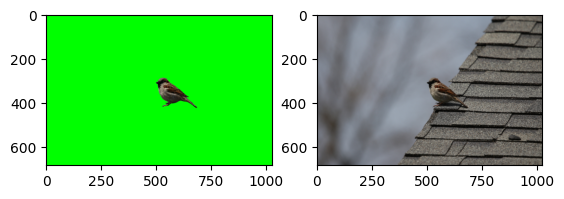

In [14]:
masks = np.array(masks)
masks.shape

mask = masks[0]
mask = np.squeeze(mask)
mask.shape

threshold = 0.5
mask_binary = (mask > threshold).astype(np.uint8) * 255

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, mask.shape[::-1])


green_bg = np.zeros_like(img)
green_bg[:, :] = [0, 255, 0]
foreground = cv2.bitwise_and(img, img, mask=mask_binary)
background = cv2.bitwise_and(green_bg, green_bg, mask=cv2.bitwise_not(mask_binary))
result = cv2.add(foreground, background)
plt.subplot(121)
plt.imshow(result)
plt.subplot(122)
plt.imshow(img)

